import functions

In [39]:
import pandas as pd
import networkx as nx
import json
from networkx.readwrite import json_graph


import the csv

In [40]:
df = pd.read_csv("data_scopus.csv")

df= df[~pd.isnull(df['Authors with affiliations'])].copy()
#fill na values
df = df.fillna(0)
df.head()

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,0,0,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,0.0
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,0,0,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,0.0
2,"Bridge damage: Detection, IFC-based semantic e...",2020,2-s2.0-85078194587,Building Information Modeling (BIM) representa...,Elsevier B.V.,0,0,"Isailović D., Stojanovic V., Trapp M., Richter...",57205293410;56421700900;24831175200;3619515940...,"Isailović, D., Department for Construction Pro...",Automation in Construction,Autom Constr,0.0
3,VR system for spatio-temporal visualization of...,2019,2-s2.0-85075706132,Social media analysis is helpful to understand...,Springer,0,0,"Okada K., Yoshida M., Itoh T., Czauderna T., S...",57201502480;57171240600;35373203100;2592569550...,"Okada, K., Ochanomizu University, Tokyo, Japan...",Multimedia Tools and Applications,Multimedia Tools Appl,0.0
4,DiseaSE: A biomedical text analytics system fo...,2019,2-s2.0-85074886243,Due to increasing volume and unstructured natu...,Academic Press Inc.,0,0,"Abulaish M., Parwez M.A., Jahiruddin",6505934038;57202719622;35590173900;,"Abulaish, M., Department of Computer Science, ...",Journal of Biomedical Informatics,J. Biomed. Informatics,0.0


Function to get author affiliation

In [41]:
def get_first_author_affilation(x):
  try:
    return x.split(";")[0].split(",")[-1].strip()
  except Exception as ex:
    print(x)
df['First_author_Country']=df['Authors with affiliations'].apply(get_first_author_affilation)

In [42]:
temp = df['First_author_Country'].unique()

# create data reference for a unique country code
codes = [[]]


get the nodes

In [43]:
nodes = df['EID'].values


G = nx.Graph()




In [44]:
nodes=[]
for row in df.iterrows():
    nodes.append((row[1]['EID'],{
            "Title" : row[1]['Title'],
            "Year" : row[1]['Year'],
            "Citations" : row[1]['Cited by'],
            "Publisher" : row[1]['Publisher'],
            #"Country": row[1]['First_author_Country'],
            "Group" : row[1]['First_author_Country'],

    }))

G.add_nodes_from(nodes)


create the graph

In [45]:

edges = []
for row in df.iterrows():
    current_paper = row[1]['EID']
    if ";" in row[1]['Author(s) ID']:
        authors =row[1]['Author(s) ID'][:-1].split(";")
        for author in authors:
            papers = df[df['Author(s) ID'].str.contains(author)]['EID'].values
            if len(papers)>0:

                for paper in papers:
                    if paper != current_paper:
                        edges.append((current_paper, paper, {"value" : row[1]['Cited by']}))
    else:
        continue


In [46]:
G.add_edges_from(edges)

In [47]:
poo = nx.drawing.spiral_layout(G)

https://stackoverflow.com/questions/48820586/removing-isolated-vertices-in-networkx

In [48]:
G.remove_nodes_from(list(nx.isolates(G)))

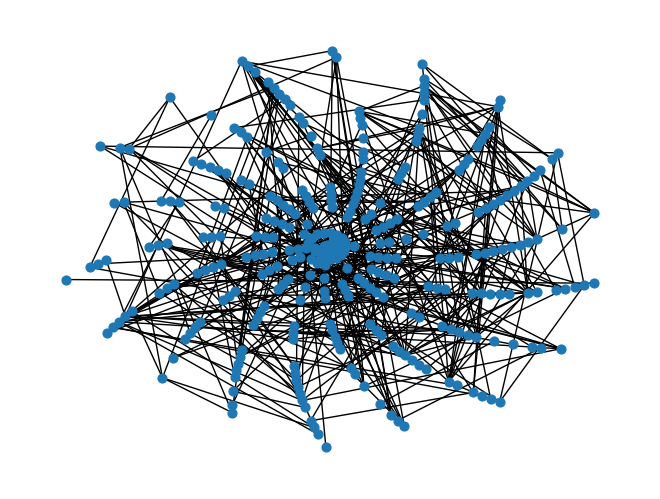

In [49]:
nx.draw(G,pos=poo, node_size=40)

In [50]:

with open("publication_network.json", 'w') as f:
    json.dump(json_graph.node_link_data(G), f, indent=4)